In [1]:
import numpy as np
import matplotlib.pyplot as plt

###  1.

In [2]:
def f(x,g,s):
    n = g.shape[0]
    l = x.shape[0]
    y = np.zeros(l)
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        y += np.exp(- np.linalg.norm(gg - x,axis=1) ** 2 / 2 /s[i]**2)
    return y

### vstack

In [3]:
a = np.array([1, 2, 3])

b = np.array([2, 3, 4])

np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

### np.linalg.norm

In [5]:
from numpy import linalg as LA

a = np.arange(9) - 4

b = a.reshape((3, 3))

b

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [6]:
LA.norm(b)  # norme 2 de la matrice

7.745966692414834

###  2.

In [11]:
def ensalea(n,a,flag=0):
    # a = .3   Q1 : pourquoi l'overwrite ?
    g = np.random.uniform(.2,.8,(n,2))
    s = np.random.uniform(0,a,n)
    if flag == 1 :
        l = 10000
        x = np.random.uniform(0,1,(l,2))
        y = f(x,g,s)
        x_A = x[np.where(y>1/2)[0],:]
        plt.figure(figsize=(6,6))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.scatter(x_A[:,0],x_A[:,1],c='magenta',marker='o')
        plt.grid();
        
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        print(gg)
        
    return g,s

###  3.

[[0.48167372 0.73585502]
 [0.48167372 0.73585502]
 [0.48167372 0.73585502]
 ...
 [0.48167372 0.73585502]
 [0.48167372 0.73585502]
 [0.48167372 0.73585502]]
[[0.52800139 0.41626444]
 [0.52800139 0.41626444]
 [0.52800139 0.41626444]
 ...
 [0.52800139 0.41626444]
 [0.52800139 0.41626444]
 [0.52800139 0.41626444]]
[[0.65324545 0.59800686]
 [0.65324545 0.59800686]
 [0.65324545 0.59800686]
 ...
 [0.65324545 0.59800686]
 [0.65324545 0.59800686]
 [0.65324545 0.59800686]]
[[0.60571121 0.3512862 ]
 [0.60571121 0.3512862 ]
 [0.60571121 0.3512862 ]
 ...
 [0.60571121 0.3512862 ]
 [0.60571121 0.3512862 ]
 [0.60571121 0.3512862 ]]


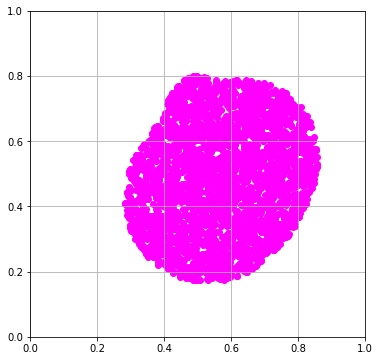

In [13]:
n = 4
a = .3
g,s = ensalea(n,a,1)

In [14]:
g

array([[0.48167372, 0.73585502],
       [0.52800139, 0.41626444],
       [0.65324545, 0.59800686],
       [0.60571121, 0.3512862 ]])

In [20]:
x = np.array([0.4,0.2])
f(x,g,s)

array([0.48558228, 0.48558228])

###  4.

In [21]:
def echant(l,g,s):
    x = np.random.uniform(0,1,(l,2))
    y = (f(x,g,s) > 1/2)*1*2 -1
    return x,y

###  5.

In [26]:
def estens(x,y,p):
    X1 = x[:,0]
    X2 = x[:,1]
    Lm = np.zeros((p,p))
    Lp = np.zeros((p,p))
    l = len(X1)
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        Lm[i,j] += (y[k] == -1)*1
        Lp[i,j] += (y[k] == 1)*1
    B = (Lp > Lm) * 1
    Re = 0
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
        if B[i,j] == 1:  # est-ce qu'il ne faut pas aussi regarder là où B(i,j)=0 ?!
            Re += (y[k] == -1) * 1
        else:
            Re += (y[k] == 1) * 1
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
    Re /= l
    return B, Re

Risque empirique : 0.00385


<Figure size 504x504 with 0 Axes>

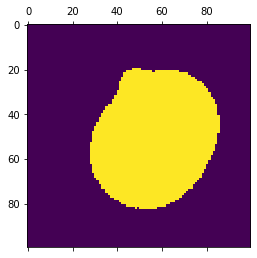

In [27]:
l = 10**5
p = 100
x,y = echant(l,g,s)
B, Re = estens(x,y,p)

plt.figure(figsize=(7,7))
plt.matshow(np.flip(B.T,axis=0));
print("Risque empirique :",Re)

###  6.

In [34]:
def testens(B,m,g,s):
    x_test, y_test = echant(m,g,s)
    p = B.shape[0]
    R = 0
    for k in range(m):
        i = int(p * x_test[k,0])
        j = int(p * x_test[k,1])
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
# ---- rajouter le test en B(i,j)=0   --------------------------------------------------------
# ---- et tester y_test  ---------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
        if B[i,j] == 1:
            R += (y_test[k] == -1) * 1
        else:
            R += (y_test[k] == 1) * 1
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
    R /= m
    return R

###  7.

l = 100, p minimisant : 5
l = 500, p minimisant : 10
l = 1000, p minimisant : 17
l = 10000, p minimisant : 40


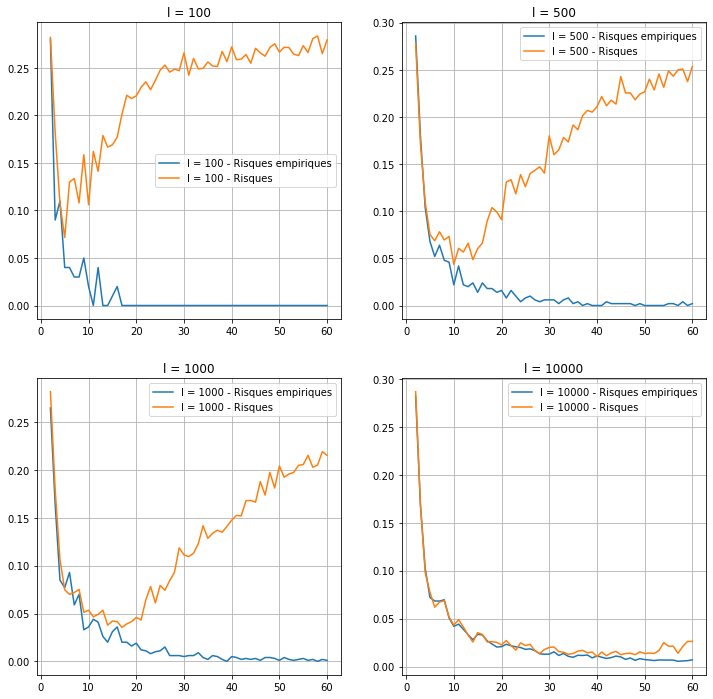

In [35]:
ls = [100, 500, 1000, 10000]
ps = np.arange(2,61)

plt.figure(figsize=(12,12))
m = 4600
p_mins = []

for _1 in range(len(ls)) :
    plt.subplot(2,2,_1+1,title=f'l = {ls[_1]}')
    Res = []
    Rs  = []
    for _2 in range(len(ps)) :
        x_train,y_train = echant(ls[_1],g,s)
        B, Re = estens(x_train,y_train,ps[_2])
        R = testens(B,m,g,s)
        Res.append(Re)
        Rs.append(R)
    p_mins.append(ps[np.argmin(Rs)])
        
    plt.plot(ps,Res, label=f'l = {ls[_1]} - Risques empiriques')
    plt.plot(ps,Rs,  label=f'l = {ls[_1]} - Risques')

    plt.grid();
    plt.legend();
    
for i in range(4):
    print(f"l = {ls[i]}, p minimisant : {p_mins[i]}")

**Commentaires :**
- > Pour $l$ fixé, les deux courbes font un saut pour les petites valeurs de $p$ (~ < 7)  puis décroissent. Elles décroissent de moins en moins fort à mesure que $l$ augmentent.
- > Pour $p$ fixé, mis à part pour les petites valeurs de $p$ (~ < 7), les deux risques croisssent avec $l$.
- > Pour $p$ fixé, mis à part pour les petites valeurs de $p$ (~ < 7), $R_{emp}^{'}(\mathbb{1}_{\hat{C}_p})$ est croît avec $l$, bien plus significativement que $\hat{R}_p$.

**En particulier, cette expérience illustre :**
- > Si l'on veut obtenir un petit risque, complexité et taille de l'échantillon d'apprentissage vont de pair. De peu de données et faible complexité, vers beaucoup de données et forte complexité.
- >  ?